In [1]:
from dataset import AnimalDataset
from train import train
from resnet18 import ResNet18
from loss import CrossEntropyLoss
from optimizer import SGD
import matplotlib.pyplot as plt
import numpy as np
import random

data_dir = "/home/an/an_workplace/Lab_CV/Data/animals" 

dataset = AnimalDataset(data_dir)
print("Tá»•ng sá»‘ áº£nh:", len(dataset))
print("Danh sÃ¡ch lá»›p:", dataset.classes)


Tá»•ng sá»‘ áº£nh: 26179
Danh sÃ¡ch lá»›p: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


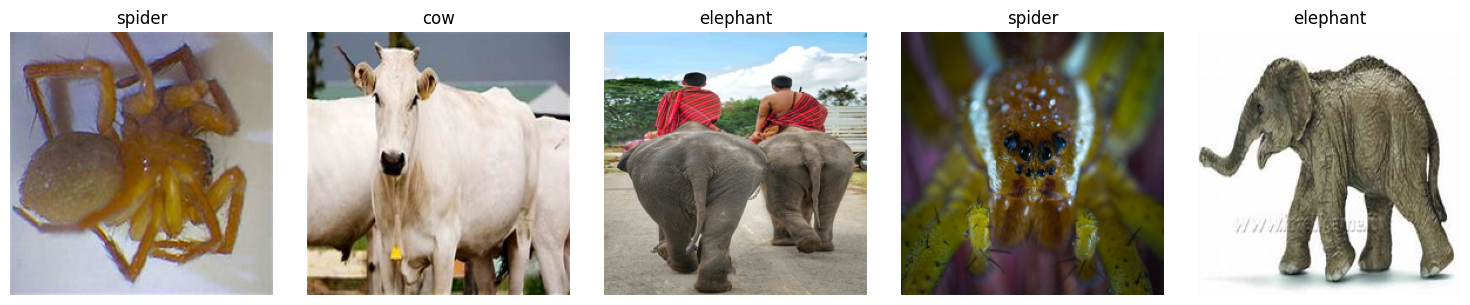

In [2]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    idx = random.randint(0, len(dataset)-1)
    img, label = dataset[idx]
    img = img.transpose(1, 2, 0)  # CHW â†’ HWC Ä‘á»ƒ hiá»ƒn thá»‹
    axs[i].imshow(img)
    axs[i].set_title(dataset.classes[label])
    axs[i].axis('off')

plt.tight_layout()
plt.show()


/tmp/ipykernel_8228/1842735393.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/an/miniconda3/envs/cv_env_py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


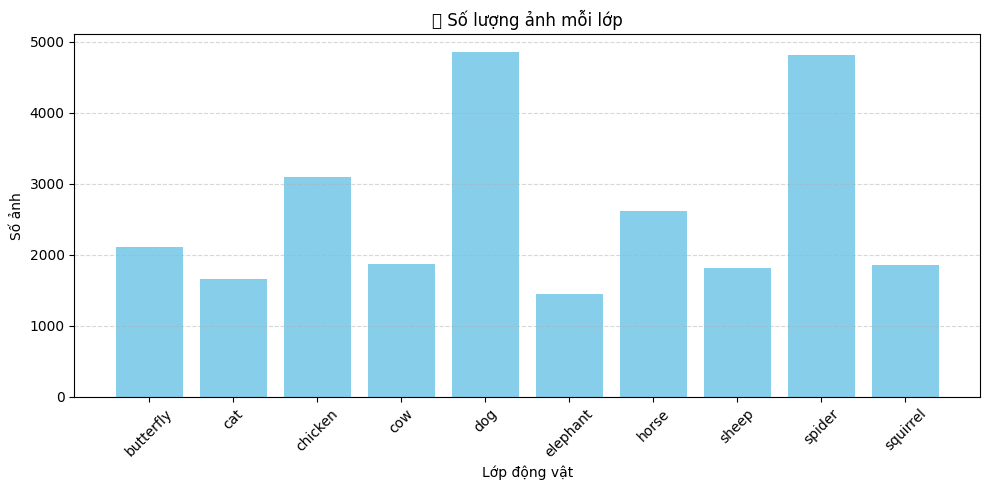

In [3]:
from collections import Counter
label_counts = Counter(dataset.labels)
class_names = [dataset.classes[i] for i in label_counts.keys()]
counts = list(label_counts.values())

# Váº½ biá»ƒu Ä‘á»“
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel("Lá»›p Ä‘á»™ng váº­t")
plt.ylabel("Sá»‘ áº£nh")
plt.title("ðŸ“Š Sá»‘ lÆ°á»£ng áº£nh má»—i lá»›p")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
model = ResNet18(num_classes=len(dataset.classes))
loss_fn = CrossEntropyLoss()

optimizer = SGD(parameters=[], lr=0.01)

In [ ]:
losses = train(model, dataset, loss_fn, optimizer, epochs=1, batch_size=1)

  Batch 1: Loss = 3.6440
  Batch 2: Loss = 4.1708
  Batch 3: Loss = 4.6946
  Batch 4: Loss = 5.2013
  Batch 5: Loss = 5.8741
  Batch 6: Loss = 6.2257


In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Biá»ƒu Ä‘á»“ máº¥t mÃ¡t trong quÃ¡ trÃ¬nh huáº¥n luyá»‡n')
plt.grid(True)
plt.show()